# FOLLOWING THE TEST INSTRUCTIONS
## DISCLAIMER
### THIS IS NOT A TEST SOLUTION, IT IS JUST AN END TO END CLASSIFICATION PROBLEM FOLLOWING THE TEST INSTRUCTIONS        
###I HAVE NOT DONE THE TEST

In [1]:
import pandas as pd
df = pd.read_csv('Data_for_UCI_named.csv')

# Dataset Description
Stability of the Grid System
Electrical grids require a balance between electricity supply and demand in order to be stable. Conventional systems achieve this balance through demanddriven electricity production. For future grids with a high share of inϐlexible (i.e., renewable) energy source, the concept of demand response is a promising
solution. This implies changes in electricity consumption in relation to electricity price changes. In this work, we’ll build a binary classiϐication model to
predict if a grid is stable or unstable using the UCI Electrical Grid Stability Simulated dataset.
Dataset: https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+


It has 12 primary predictive features and two dependent variables.
### Predictive features:
1. 'tau1' to 'tau4': the reaction time of each network participant, a real value within the range 0.5 to 10 ('tau1' corresponds to the supplier node, 'tau2'
to 'tau4' to the consumer nodes);
2. 'p1' to 'p4': nominal power produced (positive) or consumed (negative) by each network participant, a real value within the range -2.0 to -0.5 for
consumers ('p2' to 'p4'). As the total power consumed equals the total power generated, p1 (supplier node) = - (p2 + p3 + p4);
3. 'g1' to 'g4': price elasticity coefϐicient for each network participant, a real value within the range 0.05 to 1.00 ('g1' corresponds to the supplier node,
'g2' to 'g4' to the consumer nodes; 'g' stands for 'gamma');


### Dependent variables:
1. 'stab': the maximum real part of the characteristic differential equation root (if positive, the system is linearly unstable; if negative, linearly stable);
2. 'stabf': a categorical (binary) label ('stable' or 'unstable').

# TEST INSTRUCTIONS

* Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will
remain as the sole dependent variable (binary classiϐication).

* Split the data into an 80-20 train-test split with a random state of “1”. Use the standard scaler to transform the train set (x_train, **y_balanced**) and the test set
(x_test). BECAUSE OF THIS I AM MAKING THE ASSUMPTION THAT THEY WANT US TO BALANCE IT FIRST.

* Use scikit learn to train a random forest and extra trees classifier. And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use **random_state = 1** for training all models and evaluate on the test set.


* Also, to improve the Extra Trees Classifier, you will use the following parameters (number of estimators, minimum number of samples, minimum number of samples for leaf node and the number of features to consider when looking for the best split) for the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV).



```
n_estimators = [50, 100, 300, 500, 1000]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators,'min_samples_leaf': min_samples_leaf,
'min_samples_split': min_samples_split,
'max_features': max_features}
```



In [2]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
#check distribution of target variable
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [4]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

The dataset is already clean and the dataset does not seem too imbalanced and the performance of balancing was not stated in the instructions

In [5]:
#more preprocessing
X = df.drop(columns=['stab','stabf'])
y = df['stabf']

In [6]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [7]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced,y_balanced = smote.fit_sample(x_train,y_train)
x_train_balanced = pd.DataFrame(x_train_balanced, columns=x_train.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [8]:
import numpy as np
(unique, counts) = np.unique(y_balanced, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)
#see it is balaanced now

[['stable' 5092]
 ['unstable' 5092]]


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalised_train_df = scaler.fit_transform(x_train_balanced)
normalised_train_df = pd.DataFrame(normalised_train_df,columns=x_train.columns)
x_test = x_test.reset_index(drop=True)
normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df,columns=x_test.columns)

In [10]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(normalised_train_df, y_balanced)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, normalised_train_df, y_balanced, cv=5, scoring='f1_macro')
scores

array([0.80215317, 0.81786784, 0.80510386, 0.83356275, 0.80421639])

In [12]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
new_predictions = log_reg.predict(normalised_test_df)
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions,labels=['stable','unstable'])

In [13]:
cnf_mat

array([[ 552,  160],
       [ 269, 1019]])

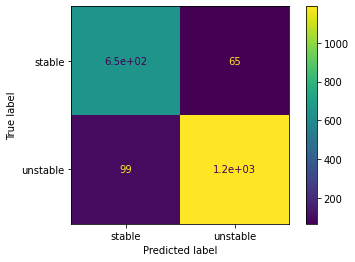

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
# fit the model on the whole dataset
model.fit(normalised_train_df,y_balanced)
plot_confusion_matrix(model, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["stable", "unstable"])

In [15]:
new_predictions1 = model.predict(normalised_test_df)
cnf_mat1 = confusion_matrix(y_true=y_test, y_pred=new_predictions1,labels=['stable','unstable'])

In [16]:
cnf_mat1

array([[ 647,   65],
       [  99, 1189]])

# Other model evaluation parameters

In [17]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions1)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 92.0


In [18]:
precision = precision_score(y_true=y_test, y_pred=new_predictions1, pos_label='stable')
print('Precision: {}'.format(round(precision*100), 2))

Precision: 87.0


In [19]:
recall = recall_score(y_true=y_test, y_pred=new_predictions1, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2)) #prints 51.0

Recall: 91.0


In [20]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions1, pos_label='stable')
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

F1: 89.0


# Extra Tree Classifier

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(random_state=1)
clf.fit(normalised_train_df,y_balanced)
new_predictions2 = clf.predict(normalised_test_df)
cnf_mat2 = confusion_matrix(y_true=y_test, y_pred=new_predictions2,labels=['stable','unstable'])

In [22]:
cnf_mat2

array([[ 634,   78],
       [  84, 1204]])

# Other model evaluation parameters

In [23]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions2)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 92.0


In [24]:
precision = precision_score(y_true=y_test, y_pred=new_predictions2, pos_label='stable')
print('Precision: {}'.format(round(precision*100), 2))

Precision: 88.0


In [25]:
recall = recall_score(y_true=y_test, y_pred=new_predictions2, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2)) #prints 51.0

Recall: 89.0


In [26]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions2, pos_label='stable')
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

F1: 89.0


# Improving Extra Tree

In [27]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]
hyperparameter_grid = {'n_estimators': n_estimators,'min_samples_leaf': min_samples_leaf,'min_samples_split': min_samples_split,
                       'max_features': max_features}
utility = RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=1),
                            param_distributions=hyperparameter_grid,random_state=1)
result = utility.fit(normalised_train_df, y_balanced)

print('Best Score: ', result.best_score_)
print('Best Params: ', result.best_params_)

Best Score:  0.9491371802402122
Best Params:  {'n_estimators': 300, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 'auto'}


In [28]:
#improved Extratree classifier
clfe = ExtraTreesClassifier(random_state=1,n_estimators=300,min_samples_split=9, min_samples_leaf= 2,max_features= 'auto')
clfe.fit(normalised_train_df,y_balanced)
new_predictionse = clfe.predict(normalised_test_df)
cnf_mate = confusion_matrix(y_true=y_test, y_pred=new_predictionse,labels=['stable','unstable'])
cnf_mate

array([[ 648,   64],
       [  95, 1193]])

# Other model evaluation parameters

In [29]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictionse)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 92.0


In [30]:
precision = precision_score(y_true=y_test, y_pred=new_predictionse, pos_label='stable')
print('Precision: {}'.format(round(precision*100), 2))

Precision: 87.0


In [31]:
recall = recall_score(y_true=y_test, y_pred=new_predictionse, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2)) #prints 51.0

Recall: 91.0


In [32]:
f1 = f1_score(y_true=y_test, y_pred=new_predictionse, pos_label='stable')
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

F1: 89.0


# XGB Classifier

In [33]:
from xgboost import XGBClassifier
model3 = XGBClassifier(random_state=1)
model3.fit(normalised_train_df, y_balanced)
new_predictions3 = model3.predict(normalised_test_df)
cnf_mat3 = confusion_matrix(y_true=y_test, y_pred=new_predictions3,labels=['stable','unstable'])
cnf_mat3

array([[ 647,   65],
       [ 114, 1174]])

# Other model evaluation parameters

In [34]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions3)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 91.0


In [35]:
precision = precision_score(y_true=y_test, y_pred=new_predictions3, pos_label='stable')
print('Precision: {}'.format(round(precision*100), 2))

Precision: 85.0


In [36]:
recall = recall_score(y_true=y_test, y_pred=new_predictions3, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2)) #prints 51.0

Recall: 91.0


In [37]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions3, pos_label='stable')
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

F1: 88.0


# LGBM Classifier

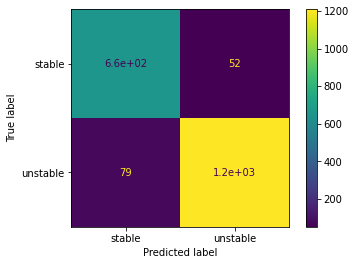

In [38]:
from lightgbm import LGBMClassifier
model4 = LGBMClassifier(random_state=1)
# fit the model on the whole dataset
model4.fit(normalised_train_df, y_balanced)
plot_confusion_matrix(model4, 
                      normalised_test_df, 
                      y_test, 
                      display_labels=["stable", "unstable"])

In [39]:
new_predictions4 = model4.predict(normalised_test_df)
cnf_mat4 = confusion_matrix(y_true=y_test, y_pred=new_predictions4,labels=['stable','unstable'])
cnf_mat4

array([[ 660,   52],
       [  79, 1209]])

# Other model evaluation parameters

In [40]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions4)
print('Accuracy: {}'.format(round(accuracy*100), 2))

Accuracy: 93.0


In [41]:
precision = precision_score(y_true=y_test, y_pred=new_predictions4, pos_label='stable')
print('Precision: {}'.format(round(precision*100), 2))

Precision: 89.0


In [42]:
recall = recall_score(y_true=y_test, y_pred=new_predictions4, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2)) #prints 51.0

Recall: 93.0


In [43]:
f1 = f1_score(y_true=y_test, y_pred=new_predictions4, pos_label='stable')
print('F1: {}'.format(round(f1*100), 2)) #prints 45.0

F1: 91.0
